In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Import monthly demand data
#manual process to combine EIA datasets before this step as they would only allow export of 10 months max at a time
#csv files had odd date format that I could not get python to recognize so reformatted in excel
#could not get hours in a month to work via .days_in_month command so added hours per month directly based on webpage data
demand_data = pd.read_csv('CISO demand data 2016 2017 w hours.csv')
demand_data.head(2)

,Month,CISO demand megawatthours,CAL demand megawatthours,Hours in Month
0,12/1/2017 0:00,18379575,22420992,744
1,11/1/2017 0:00,17352790,21123360,720


In [3]:
# Change scale of megawatthours to megawatts for comparison to production
demand_data['CISO Mw']=(demand_data['CISO demand megawatthours'] / demand_data['Hours in Month'])
demand_data.head(2)

,Month,CISO demand megawatthours,CAL demand megawatthours,Hours in Month,CISO Mw
0,12/1/2017 0:00,18379575,22420992,744,24703.729839
1,11/1/2017 0:00,17352790,21123360,720,24101.097222


In [5]:
# Convert dates into sortable format and sort
import datetime
pd.plotting.register_matplotlib_converters()
demand_data['Month'] = pd.to_datetime(demand_data['Month'])
demand_data.sort_values(by=['Month']).head()

,Month,CISO demand megawatthours,CAL demand megawatthours,Hours in Month,CISO Mw
23,2016-01-01,17934580,21946816,744,24105.618280
22,2016-02-01,16408995,20118078,696,23576.142241
21,2016-03-01,17893864,21827515,744,24050.892473
20,2016-04-01,17468662,21318886,720,24262.030556
19,2016-05-01,18616178,22757042,744,25021.744624


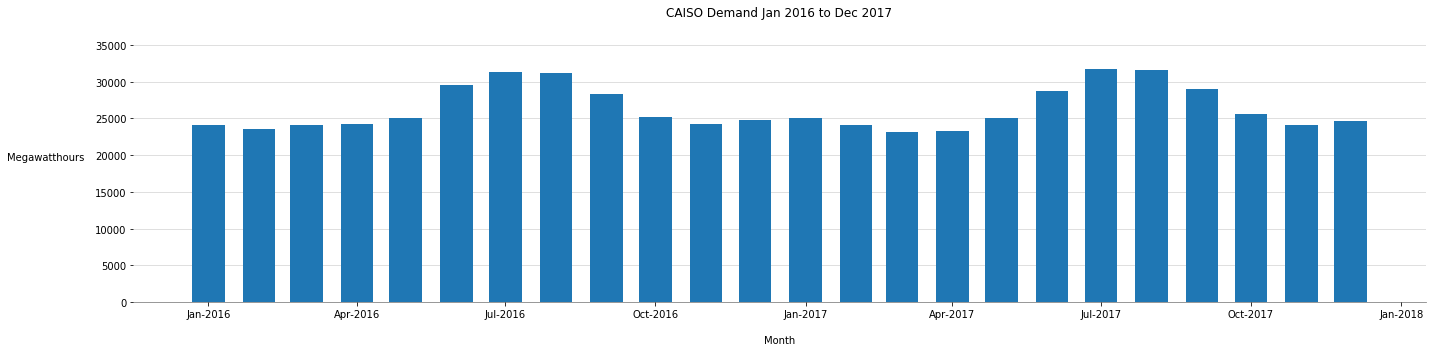

In [27]:
# Plot bar chart
fig,ax = plt.subplots()
fig.set_figheight(5) #adjust if needed
fig.set_figwidth(20) #adjust if needed
y_axis = demand_data['CISO Mw'] 
x_axis = demand_data['Month'] 
plt.bar(x_axis,y_axis,width=20,align='center') #not sure why widths default were so narrow
plt.ylim(0,max(y_axis)*1.2) #adjust if needed
#plt.xlim(min(x_axis),max(x_axis)) ****set so don't see month that is not in set in axis
plt.title("CAISO Demand Jan 2016 to Dec 2017")
plt.xlabel ("\nMonth")
plt.ylabel ("Megawatthours  ",rotation='0',ha='right')
plt.tight_layout()

# Adjust for better data viz
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_alpha(.5)
plt.grid(axis='y',alpha=.5)
ax.set_axisbelow(True)
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y')) # Change label frequnecy?

#plt.savefid(path/name.format)     #if needed
#plt.legend   #probably won't need but not sure what it will look like yet

In [ ]:
#wont need this cell when merge
full_data = pd.read_csv('all_breakdown.csv')
full_data['SOLAR'] = full_data['SOLAR'].fillna(0)
full_data['SOLAR PV'] = full_data['SOLAR PV'].fillna(0)
full_data['SOLAR THERMAL'] = full_data['SOLAR THERMAL'].fillna(0)
full_data['SOLAR TOTAL'] = full_data['SOLAR']+full_data['SOLAR PV']+full_data['SOLAR THERMAL']
display(full_data.head(2))


In [ ]:
# Add second layer of renewable production to chart

#what unit for production?


# divide the number of megawatt hours by the number of hours.

# def autolabel(bars):
#     count=0
#     for bar in bars:
#         height = bar.get_height()
#         ax.text(bar. get_x() + bar.get_width()/2., .7*height,
#                 ((drugs[count])+'\n'+str(int(height*100))+'%'),color="w",weight='bold',
#                 ha='center', va='bottom')
#         count +=1
# autolabel(chart_num)